
# Project: Exploring Hollywood Trends

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains details about 10,000 movies, including key people involved in the production and financial stats. It was obtained by a kaggle team from The Movie Database (TMDB), and is a more current version of the original dataset from IMDB. For each movie, the dataset has the following metrics:

id - Unique identification from tmdb;

imdb_id - Unique identification from imdb;

popularity - Viewer's perception score;

budget - Cost of making the movie;

revenue - Income from the movie;

original_title - Title of movie;

cast - Actors and actresses;

homepage - Movie website;

director - Mastermind behind the movie;

tagline - Movie tagline;

keywords - Tags associated with the movie;

overview - Synopsis of the movie;

runtime - Movie duration;

genres - Movie category;

production_companies - Movie houses that made the movie;

release_date - When the movie was released to the public;

vote_count - Number of votes for each movie;

vote_average - Average of vote values;

release_year - Year the movie was realeased;

budget_adj	- Adjusted budget,

revenue_adj - Adjusted revenue




### Question(s) for Analysis

For this analysis, we want to ascertain the top most significant factore in determining a movie's success at the box office, strictly based on profit margins.

We want to examine what effects the BUDGET and GENRE have on movie profits

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

movies = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0;

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

Here we'll access and clean our data to get rid of missing or inaccurate values, and correct formatting where necessary

In [3]:
# Let's get an overview of the dataframe

movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# See how many rows and columns there are

movies.shape

(10866, 21)

In [5]:
# Check for the datatypes in each column

movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# Get summary stats for each column

movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Inspect for missing or null values

movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning


A few cleaning procedures 

There are some columns with null values, but thankfully, the ones most pertinent to this analysis are mostly complete.
First, we shall remove some of the redundant columns, especially the ones with many missing values to trim the dataset


In [8]:
movies.drop(['homepage','tagline', 'keywords', 'overview', 'cast', 'director', 'production_companies'], axis = 1, inplace = True);

One of the columns we need, genres, has missing values. Let's inspect those and see how best to fix them

In [9]:
movies[movies['genres'].isnull()];

We see that all the movies with missing genre values also have missing budget and revenue data, which are important to our analysis.
Instead of going to Google to find out this information, we reckon 23 is a small enough percentage of 10k that we can do away with them.

Remove rows with missing genre information

In [10]:
movies.dropna(subset = ['genres'], inplace = True)

Next, the genres column has multiple genres per movie, delimited by pipes. 
For ease of analysis, we want to use the main genre2 of each movie.

Split the genres column

In [11]:
movies[['genre1', 'genre2', 'genre3', 'genre4', 'genre5']] = movies['genres'].str.split('|', expand = True)

See how many unique genres we have

In [12]:
movies['genre1'].nunique()
movies['genre3'].nunique()

20

My first choice is to combine the first 2 genres into one, but that would be too many variables to plot on a graph. So for practicality's sake, we'll take the main genre only and remove the rest. 

In [13]:
movies['genres'] = movies['genre1']

Remove all other genre columns

In [14]:
movies.drop(['genre1', 'genre2', 'genre3', 'genre4', 'genre5'], axis = 1, inplace = True)

We should now have a useable number of genres

In [15]:
movies['genres'].nunique()

20

From our summary stats above, we see that the minimum, 25th and 50th percentile of the financial columns read only zeros. This means a lot of the data is missing.
This didn't reflect when we inspected for missing values, meaninig we have to search for the zeros specifically.

In [16]:
(movies['budget'].values == 0.000000).sum()
(movies['revenue'].values == 0.000000).sum()
(movies['budget_adj'].values == 0.000000).sum() 

5674

More than half of the movies do not have financial information. That's a huge figure, and there might be 2 ways of fixing this: removing those columns completely, or inputing the average financial values of these movies based on their genres.
Since they're so many, using averages would create too much inaccurate data, so we will remove them.

In [17]:
movies.drop(movies[movies['budget'] == 0.000000].index, inplace = True)

movies.shape

(5169, 14)

Finally, we need to convert the release_date column to datetime instead of string

In [18]:
movies['release_date'] = pd.to_datetime(movies['release_date'], format = '%m/%d/%y')

movies.dtypes

id                         int64
imdb_id                   object
popularity               float64
budget                     int64
revenue                    int64
original_title            object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

Now we have a clean dataset of 5,169 movies to work with 

<a id='eda'></a>
## Exploratory Data Analysis




### How does movie genre affect profitability?

First, let's create a column for profit to make comparisons easier. That would be a simple revenue, less budget

In [19]:
movies['profit'] = movies['revenue'] - movies['budget']

Next, we'll need to find average profits for each unique genre. We can do this using a groupby statement, and name it genre_avg.

We'll first create a function to find averages, since we'll be performing this operation multiple times.

In [20]:
def avg_fct(var):
    global var_avg
    var_avg = pd.DataFrame(movies['profit'].groupby(var).mean()) 
    return var_avg

Doing that turns the first column into row names, so we need to find the code to change that, and insert it into our function.


Our new function will read as follows

In [21]:
def avg_fct(var):
    global var_avg
    var_avg = pd.DataFrame(movies['profit'].groupby(var).mean()) 
    var_avg.index.name = 'variable'
    var_avg.reset_index(inplace = True)
    return var_avg

We also ned to round off the large numbers to make them useable. Once again, we'll add this code to our function.

Our final function will thus be

In [22]:
def avg_fct(var):
    global var_avg
    var_avg = pd.DataFrame(movies['profit'].groupby(var).mean()) 
    var_avg.index.name = 'variable'
    var_avg.reset_index(inplace = True)
    var_avg['profit'] = round(var_avg['profit'])
    return var_avg

Now we'll use our function on the Genres column to find the averages

In [23]:
avg_fct(movies['genres'])

,variable,profit
0,Action,58819588.0
1,Adventure,132625026.0
2,Animation,139296892.0
3,Comedy,36554606.0
4,Crime,31507527.0
5,Documentary,9272190.0
6,Drama,27353969.0
7,Family,118796067.0
8,Fantasy,80411824.0
9,History,55923969.0


 Now we can plot

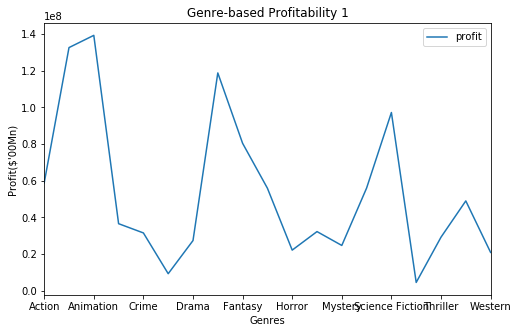

In [24]:
var_avg.plot(x = 'variable', y = 'profit', figsize = [8,5])
plt.xlabel ('Genres')
plt.ylabel ("Profit($'00Mn)")
plt.title ('Genre-based Profitability 1');

We can make a bar graph to more clearly see the relationship between genre and profits

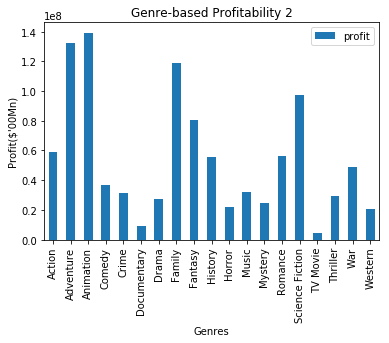

In [25]:
var_avg.plot(x = 'variable', y = 'profit', kind = 'bar')
plt.xlabel ('Genres')
plt.ylabel ("Profit($'00Mn)")
plt.title ('Genre-based Profitability 2');

From the above graphs, we can clearly see that Animated movies gross higher than other genres, followed by Adventure and then Family movies.

So, in answer to our first research question, YES, a movie's genre does play a role in its profitability.


### Are expensive movies more profitable?

First, we want to sort movie budgets into ranges to make analysis easier.
Then we will take average profits for each range, and plot both in graphs to explore correlation. 


In [26]:
movies.loc[movies['budget'].between(1, 1000000, 'both'), 'range'] = '1'
movies.loc[movies['budget'].between(1000000, 10000000, 'right'), 'range'] = '10'
movies.loc[movies['budget'].between(10000000, 50000000, 'right'), 'range'] = '50'
movies.loc[movies['budget'].between(50000000, 100000000, 'right'), 'range'] = '100'
movies.loc[movies['budget'].between(100000000, 250000000, 'right'), 'range'] = '250'
movies.loc[movies['budget'].between(250000000, 500000000, 'right'), 'range'] = '500'

In [27]:
movies['range'] = movies['range'].astype('int')

Next, we need to find average profits for all the budget categories we've created. We can reuse the function from before

In [28]:
avg_fct(movies['range'])

,variable,profit
0,1,4493904.0
1,10,11931764.0
2,50,33131991.0
3,100,86461914.0
4,250,284588511.0
5,500,490863300.0


This initial table seems to show a positive correlation. We can see it better with a plot.

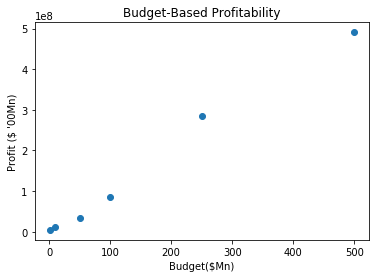

In [29]:
plt.scatter(var_avg['variable'], var_avg['profit'])
plt.xlabel ('Budget($Mn)')
plt.ylabel ("Profit ($ '00Mn)")
plt.title ('Budget-Based Profitability');

We can see from the scatter plot that a higher budget seems to lead to higher profits in a movie. These could be due, in part, to better publicity and marketing, and better looking graphics and production.

Thus, in answer to our second research question, movie budget DOES have a posotive correlation to profitability.

<a id='conclusions'></a>
## Conclusions




From our analysis, we can draw 2 simple coclusions

1. Movie genres seem to affect how profitable they are. Animated movies appear most profitbale, followed by Adventure and then Family Movies

2. How much money is spent on a movie also seems to have a positive correlation to how much it makes. Movies that cost between 250 million and  500 million dollars to make seem to be most profitable.

We could also infer a few more things, like the fact that movie costs seem to play a bigger role than genre in profitability. We get this from the fact that the highest profit value in the genres chart is 140 million, while in the budget chart its almost 500 Million.

Furthermore, family/kid friendly movies tend to do better than others. Which would be why animations and family movies rank so high in profitability.

### Project Limitations

A few limitations do exist, though, with the data.

1. We took only the first genre assigned to each movie, and dumped the rest. Movies that would otherwise fit into more than one genre have thus been restricted to just one.

2. Because more than half of the entries in the original dataset contained null financial information, we lost a healthy chunk of data whcih could have significantly altered the results of this analysis. It would be better to get more complete and accurate data to get a better, fuller picture of our subject.

3. Some of the movies had rather ridiculous budget and profit information, which might need to be verified for authenticity. for example, some had budgets of 4 dollars. If these pieces of information were inaccurate, they could greatly affect our analysis and results. 

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0